## IMPORTING LIBRARIES

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
df = sns.load_dataset('titanic')

## GLIMPSE OF DATASET & INFO

In [291]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [293]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## NULL VALUES IN DATASET

In [294]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

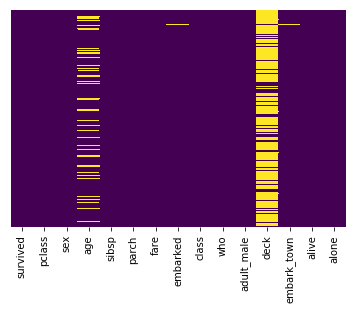

In [295]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [296]:
(df['age'].isnull().sum())/(df.shape[0])*100

19.865319865319865

## AGE DISTRIBUTION

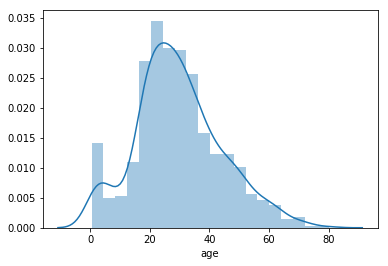

In [297]:
sns.distplot(df['age'][df['age'].notnull()])

In [298]:
len(df[df['survived']==1]['survived'])

342

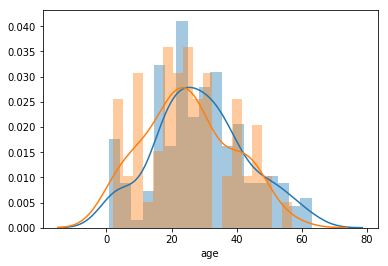

In [299]:
sns.distplot(df[df['sex']=='female'][df[df['sex']=='female']['survived']==1]['age'].dropna(), bins=18)
sns.distplot(df[df['sex']=='female'][df[df['sex']=='female']['survived']==0]['age'].dropna(), bins=18)

In [300]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

## AGE VS CLASS & SEX

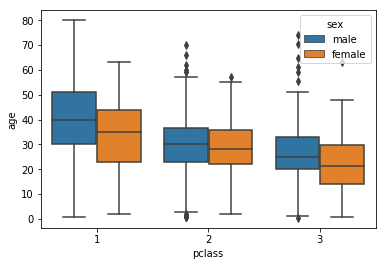

In [301]:
sns.boxplot(x=df['pclass'], y=df['age'],hue=df['sex'] )

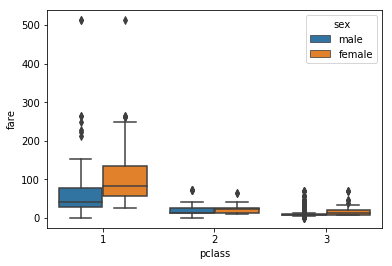

In [302]:
sns.boxplot(x=df['pclass'], y=df['fare'],hue=df['sex'] )

# IMPUTING MISSING DATA INTO AGE COLUMN 

In [303]:
df[df['pclass']==1][df[df['pclass']==1]['sex']=='female']['age'].mean()

34.61176470588235

In [304]:
df[df['pclass']==1][df[df['pclass']==1]['sex']=='male']['age'].mean()

41.28138613861386

In [305]:
df[df['pclass']==2][df[df['pclass']==2]['sex']=='female']['age'].mean()

28.722972972972972

In [306]:
df[df['pclass']==2][df[df['pclass']==2]['sex']=='male']['age'].mean()

30.74070707070707

In [307]:
df[df['pclass']==3][df[df['pclass']==3]['sex']=='female']['age'].mean()

21.75

In [308]:
df[df['pclass']==3][df[df['pclass']==3]['sex']=='male']['age'].mean()

26.507588932806325

In [309]:
def getage(col):
    newage=[]
    for i in range(col.shape[0]):
        if pd.isnull(col.iloc[i][0]):
            if col.iloc[i][1]==1:
                if col.iloc[i][2]=='male':
                    newage.append(41.28)
            if col.iloc[i][1]==1:
                if col.iloc[i][2]=='female':
                    newage.append(34.61)
            if col.iloc[i][1]==2:
                if col.iloc[i][2]=='male':
                    newage.append(30.74)
            if col.iloc[i][1]==2:
                if col.iloc[i][2]=='female':
                    newage.append(28.72)
            if col.iloc[i][1]==3:
                if col.iloc[i][2]=='male':
                    newage.append(26.50)
            if col.iloc[i][1]==3:
                if col.iloc[i][2]=='female':
                    newage.append(21.75)
        else:
            newage.append(col.iloc[i][0])
    return newage

In [310]:
newage = getage(df[['age','pclass','sex']])

In [311]:
newage = pd.DataFrame(newage, columns=['newage'])

In [312]:
df1 = pd.concat([df,newage], axis=1)

In [313]:
df1.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,newage
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,26.5
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,2.0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,27.0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,14.0


## EXPLORATORY ANALYSIS

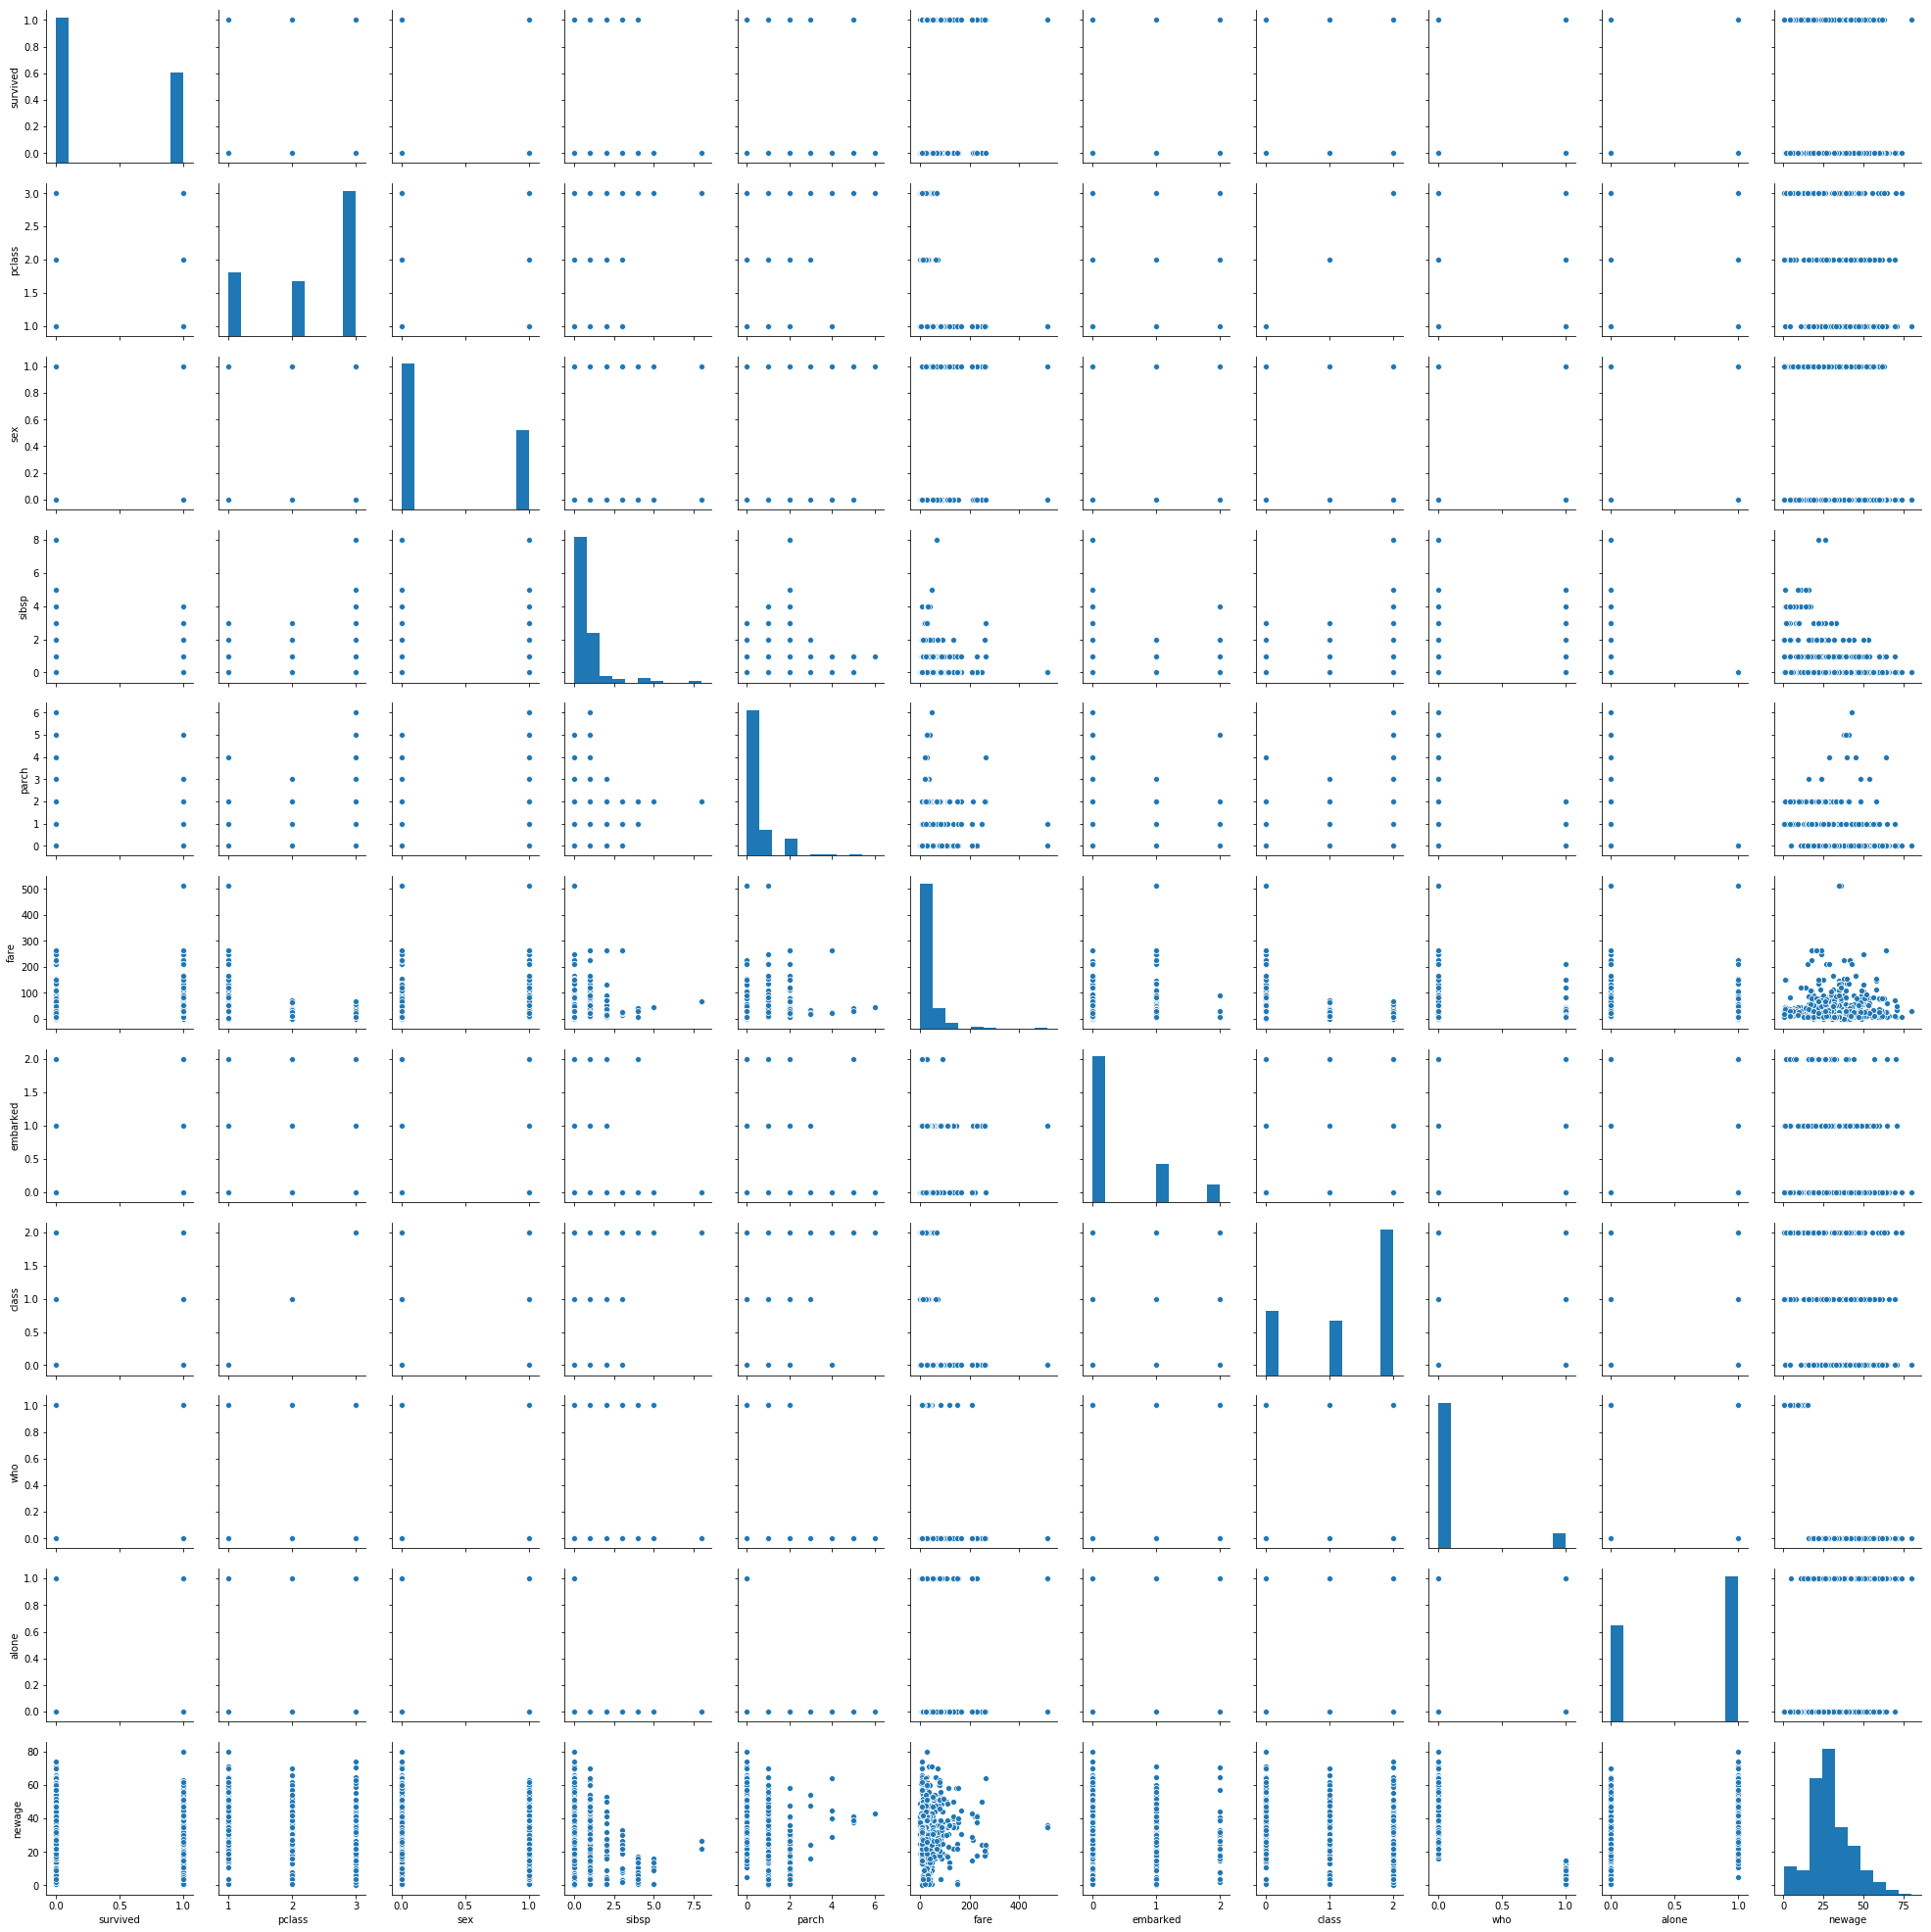

In [388]:
sns.pairplot(df1)

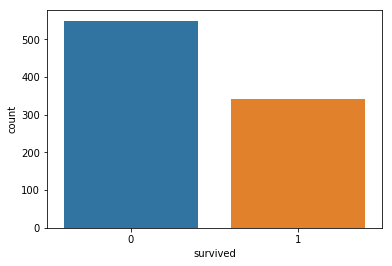

In [395]:
sns.countplot(x=df['survived'])

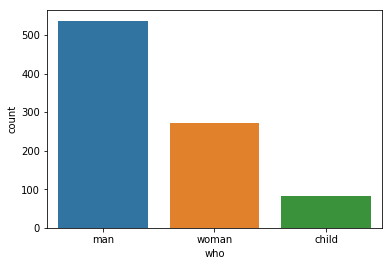

In [394]:
sns.countplot(x=df['who'])

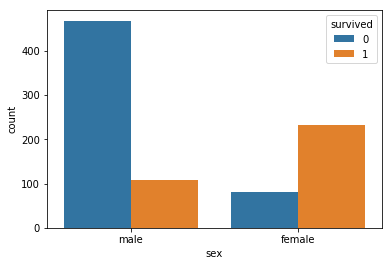

In [392]:
sns.countplot(x=df['sex'], hue=df['survived'])

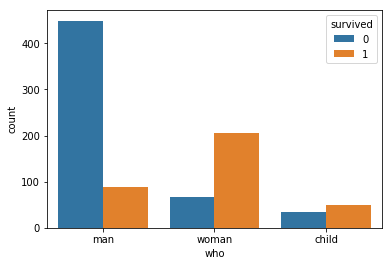

In [393]:
sns.countplot(x=df['who'], hue=df['survived'])

C:\Users\Brejees Francis\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Brejees Francis\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Brejees Francis\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


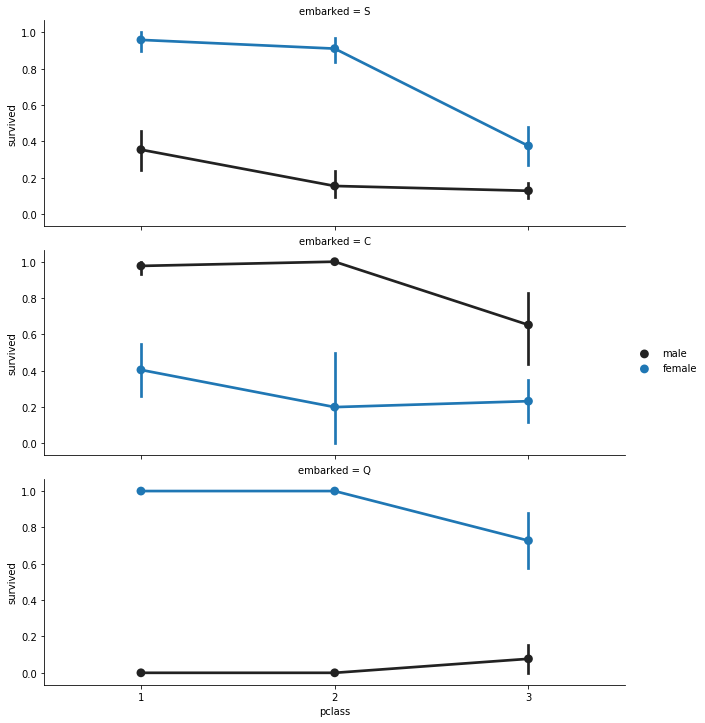

In [228]:
a = sns.FacetGrid(df1, row='embarked', height=2.5, size=(4))
a.map(sns.pointplot, 'pclass', 'survived', 'sex')
a.fig.set_size_inches(10,10)
a.add_legend()

## DATA PREPROCESSING

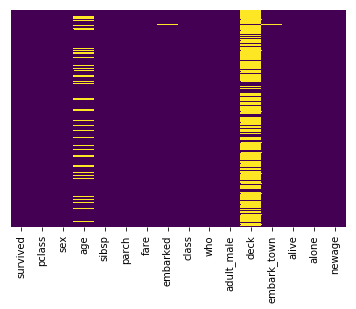

In [318]:
sns.heatmap(df1.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [319]:
df1.drop(['age','deck','alive', 'embark_town'], axis=1, inplace=True)

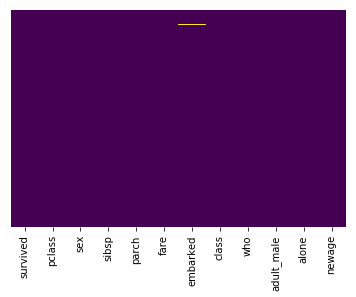

In [320]:
sns.heatmap(df1.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [321]:
df1['embarked'][df1['embarked'].isnull()]

61     NaN
829    NaN
Name: embarked, dtype: object

In [322]:
df1['embarked'].fillna(df1['embarked'].mode()[0], inplace=True)

In [323]:
df1['embarked'].isnull().sum()

0

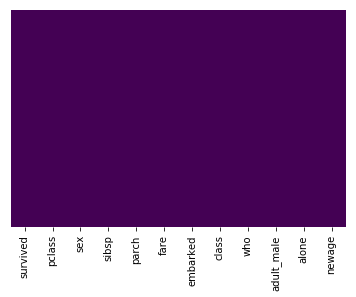

In [324]:
sns.heatmap(df1.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [325]:
df1.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,alone,newage
0,0,3,male,1,0,7.2500,S,Third,man,True,False,22.0
1,1,1,female,1,0,71.2833,C,First,woman,False,False,38.0
2,1,3,female,0,0,7.9250,S,Third,woman,False,True,26.0
3,1,1,female,1,0,53.1000,S,First,woman,False,False,35.0
4,0,3,male,0,0,8.0500,S,Third,man,True,True,35.0


In [326]:
df1['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [327]:
sex = {'male':0, 'female':1}
df1['sex'] = df1['sex'].map(sex)

In [328]:
df1.head(3)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,alone,newage
0,0,3,0,1,0,7.2500,S,Third,man,True,False,22.0
1,1,1,1,1,0,71.2833,C,First,woman,False,False,38.0
2,1,3,1,0,0,7.9250,S,Third,woman,False,True,26.0


In [329]:
df1['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [330]:
embarked = {'S':0, 'C':1, 'Q':2}
df1['embarked'] = df1['embarked'].map(embarked)

In [331]:
df1.head(3)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,alone,newage
0,0,3,0,1,0,7.2500,0,Third,man,True,False,22.0
1,1,1,1,1,0,71.2833,1,First,woman,False,False,38.0
2,1,3,1,0,0,7.9250,0,Third,woman,False,True,26.0


In [332]:
df1['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [333]:
classs = {'First':0, 'Second':1, 'Third':2}
df1['class'] = df1['class'].map(classs)

In [334]:
df1.head(3)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,alone,newage
0,0,3,0,1,0,7.2500,0,2,man,True,False,22.0
1,1,1,1,1,0,71.2833,1,0,woman,False,False,38.0
2,1,3,1,0,0,7.9250,0,2,woman,False,True,26.0


In [335]:
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [336]:
df1.head(10)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,alone,newage
0,0,3,0,1,0,7.2500,0,2,man,True,False,22.0
1,1,1,1,1,0,71.2833,1,0,woman,False,False,38.0
2,1,3,1,0,0,7.9250,0,2,woman,False,True,26.0
3,1,1,1,1,0,53.1000,0,0,woman,False,False,35.0
4,0,3,0,0,0,8.0500,0,2,man,True,True,35.0
5,0,3,0,0,0,8.4583,2,2,man,True,True,26.5
6,0,1,0,0,0,51.8625,0,0,man,True,True,54.0
7,0,3,0,3,1,21.0750,0,2,child,False,False,2.0
8,1,3,1,0,2,11.1333,0,2,woman,False,False,27.0
9,1,2,1,1,0,30.0708,1,1,child,False,False,14.0


In [337]:
who = {'man':0, 'woman':0, 'child':1}
df1['who'] = df1['who'].map(who)

In [338]:
df1.head(10)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,alone,newage
0,0,3,0,1,0,7.2500,0,2,0,True,False,22.0
1,1,1,1,1,0,71.2833,1,0,0,False,False,38.0
2,1,3,1,0,0,7.9250,0,2,0,False,True,26.0
3,1,1,1,1,0,53.1000,0,0,0,False,False,35.0
4,0,3,0,0,0,8.0500,0,2,0,True,True,35.0
5,0,3,0,0,0,8.4583,2,2,0,True,True,26.5
6,0,1,0,0,0,51.8625,0,0,0,True,True,54.0
7,0,3,0,3,1,21.0750,0,2,1,False,False,2.0
8,1,3,1,0,2,11.1333,0,2,0,False,False,27.0
9,1,2,1,1,0,30.0708,1,1,1,False,False,14.0


In [339]:
df1.drop('adult_male', axis=1, inplace=True)

In [340]:
df1.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,alone,newage
0,0,3,0,1,0,7.2500,0,2,0,False,22.0
1,1,1,1,1,0,71.2833,1,0,0,False,38.0
2,1,3,1,0,0,7.9250,0,2,0,True,26.0
3,1,1,1,1,0,53.1000,0,0,0,False,35.0
4,0,3,0,0,0,8.0500,0,2,0,True,35.0


In [341]:
df1['alone'].value_counts()

True     537
False    354
Name: alone, dtype: int64

In [342]:
alone = {True:1, False:0}
df1['alone']=df1['alone'].map(alone)

In [343]:
df1.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,alone,newage
0,0,3,0,1,0,7.2500,0,2,0,0,22.0
1,1,1,1,1,0,71.2833,1,0,0,0,38.0
2,1,3,1,0,0,7.9250,0,2,0,1,26.0
3,1,1,1,1,0,53.1000,0,0,0,0,35.0
4,0,3,0,0,0,8.0500,0,2,0,1,35.0


## MODEL BUILDING

In [345]:
x = df1.iloc[:,1:]
x.head()

,pclass,sex,sibsp,parch,fare,embarked,class,who,alone,newage
0,3,0,1,0,7.2500,0,2,0,0,22.0
1,1,1,1,0,71.2833,1,0,0,0,38.0
2,3,1,0,0,7.9250,0,2,0,1,26.0
3,1,1,1,0,53.1000,0,0,0,0,35.0
4,3,0,0,0,8.0500,0,2,0,1,35.0


In [347]:
y = pd.DataFrame(df1.iloc[:,0])
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [344]:
from sklearn.model_selection import train_test_split

In [348]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [350]:
x_train.shape

(596, 10)

In [352]:
y_train.shape

(596, 1)

In [353]:
from sklearn.linear_model import LogisticRegression

In [375]:
model = LogisticRegression(solver='lbfgs', max_iter=200)

In [377]:
model.fit(x_train, y_train)

C:\Users\Brejees Francis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Brejees Francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [378]:
y_pred = model.predict(x_test)

In [379]:
y_pred = pd.DataFrame(y_pred, columns=['y_pred'])

In [380]:
y_test.reset_index(drop=True, inplace=True)

In [381]:
y_pred.reset_index(drop=True, inplace=True)

In [382]:
comparison = pd.concat([y_test, y_pred], ignore_index=True, axis=1)
comparison.head()

,0,1
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1


## MODEL PERFORMANCE

In [383]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [384]:
accuracy_score(y_test, y_pred)

0.8169491525423729

In [385]:
confusion_matrix(y_test, y_pred)

array([[153,  22],
       [ 32,  88]], dtype=int64)

In [386]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       175
           1       0.80      0.73      0.77       120

   micro avg       0.82      0.82      0.82       295
   macro avg       0.81      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295

